In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
results = pd.read_csv("large_test_results.csv") # query18_test_results.csv

In [81]:
# Sort Query Name column to in-order
def extract_number(name):
    return int(name.split(" ")[1])

results['Query Number'] = results.apply(lambda row : extract_number(row['Query Name']), axis = 1)
results = results.sort_values(['Query Number'])

# Fix the runs column
def fix_runs(runs):
    new_runs = list(str(str(runs)[1:-1]).split(","))
    for i in range(0, len(new_runs)):
        new_runs[i] = float(new_runs[i].strip())
    return new_runs

results['Runs'] = results.apply(lambda row : fix_runs(row['Runs']), axis = 1)

In [82]:
results.head()

,Data Type,Query Name,Average,Runs,Query Number
0,Pandas,Query 1,4.090,"[6.994357109069824, 4.557590484619141, 4.87666...",1
1,SQL,Query 1,6.340,"[6.745879411697388, 6.463547945022583, 6.87639...",1
4,Pandas,Query 4,1.150,"[1.6783547401428223, 1.1443407535552979, 1.104...",4
5,SQL,Query 4,0.611,"[1.1188530921936035, 0.5866117477416992, 0.601...",4
2,Pandas,Query 18,3.260,"[4.084979295730591, 3.1212868690490723, 2.9915...",18


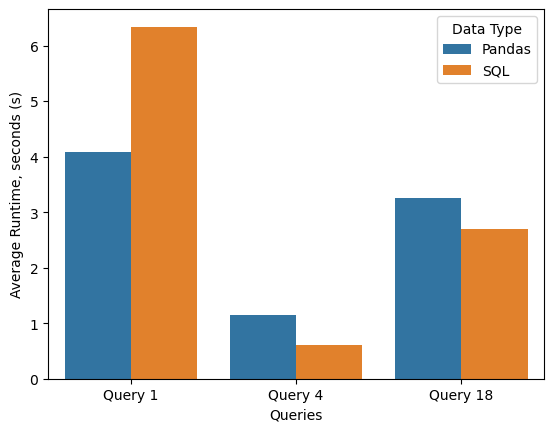

In [83]:
# plot with seaborn barplot
ax = sns.barplot(data=results, x='Query Name', y='Average', hue='Data Type')
ax.set(xlabel='Queries', ylabel='Average Runtime, seconds (s)')
plt.show()

In [84]:
results.head()

,Data Type,Query Name,Average,Runs,Query Number
0,Pandas,Query 1,4.090,"[6.994357109069824, 4.557590484619141, 4.87666...",1
1,SQL,Query 1,6.340,"[6.745879411697388, 6.463547945022583, 6.87639...",1
4,Pandas,Query 4,1.150,"[1.6783547401428223, 1.1443407535552979, 1.104...",4
5,SQL,Query 4,0.611,"[1.1188530921936035, 0.5866117477416992, 0.601...",4
2,Pandas,Query 18,3.260,"[4.084979295730591, 3.1212868690490723, 2.9915...",18


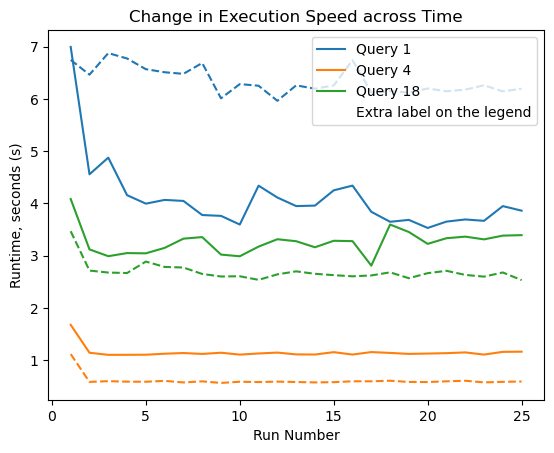

In [100]:
# Make graph of change in runtimes
# Y: Run time, X: Run Number
# Line: Query Number
prev_colors = {}

for index, row in results.iterrows():
    if row["Data Type"] == "SQL":
        line_style = 'dashed'
        legend_info = None
    else:
        line_style = 'solid'
        legend_info = row["Query Name"]
    
    # Choose line color
    if prev_colors.get(row["Query Name"], None) == None:
        # Not in dataframe
        line = plt.plot(list(range(1, len(row["Runs"])+1)), row["Runs"], label=legend_info, linestyle=line_style)
        prev_colors[row["Query Name"]] = line[0].get_color()
    else:
        color_line = prev_colors[row["Query Name"]]
        plt.plot(list(range(1, len(row["Runs"])+1)), row["Runs"], label=legend_info, linestyle=line_style, color=color_line)

# Legend Info
plt.plot([], [], ' ', label="Extra label on the legend")
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')

plt.title('Change in Execution Speed across Time')
plt.xlabel('Run Number')
plt.ylabel('Runtime, seconds (s)')
plt.legend()
plt.show()